In [56]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\P2\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [57]:
# Authentication
consumerKey="dSfolEQezmcaGCP8RmRypIXS6"
consumerSecret="OXB8k9tIeK6ONt8nPXrdXPhje6slTclbWZRlCj4ChmMsG989NE"
accessToken="545887288-aONnOFpmoGUhYVvDi74vz8xWdDPZqPOdkdrEkMiC"
accessTokenSecret="HlUUPcXKXnNbNb3oeAksIlz1NcyiorvtqL8vFZA80r2cz"
keys=[]

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Arıyacağınız hashtagı giriniz: ")
noOfTweet = int(input ("Kaçtane twit analiz etmek istiyorsunuz? : "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [14]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Arıyacağınız hashtagı giriniz: ")
noOfTweet = int(input ("Kaç tane twit analiz etmek istiyorsunuz? : "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Arıyacağınız hashtagı giriniz:  #NeşetErtaş
Kaçtane twit analiz etmek istiyorsunuz? :  10


RT @mansuryavas06: "Nerede bir türkü söyleyen görürsen korkma, yanına otur. Çünkü kötü insanların türküleri yoktur."

Bozkırın Tezenesi'ne…


LookupError: 
**********************************************************************
  Resource [93mvader_lexicon[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('vader_lexicon')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93msentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt[0m

  Searched in:
    - 'C:\\Users\\P2/nltk_data'
    - 'C:\\Users\\P2\\anaconda3\\nltk_data'
    - 'C:\\Users\\P2\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\P2\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\P2\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [25]:
#Number of Tweets (Total, Positive, Negative, Neutral)

tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  100
positive number:  2
negative number:  1
neutral number:  97


In [26]:
tweet_list

,0
0,RT @seda_cvs: Kalın kafalarınız alsın artık aş...
1,RT @teacherszn: Aşı olduktan sonra size haklar...
2,RT @idem23483381: #BoykotKanalD alçaklara kar ...
3,RT @Ulutasomer61: Hipnoz dan kurtulmanın tek b...
4,RT @Osmanunsal58: KANAL D hakkında bakalım #RT...
...,...
95,RT @MedyaEge: Sokak ortasında silahlı saldırı:...
96,RT @selcukbirdal: Senaryoya kim karar verdi? \...
97,Ekol Hastanesi Almanya Basınında https://t.co/...
98,RT @Murat50105410: #BoykotKanalD


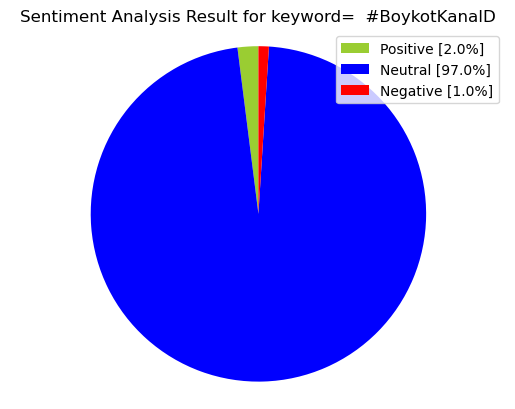

In [27]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [28]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [29]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @seda_cvs: Kalın kafalarınız alsın artık aş...,RT @seda_cvs: Kalın kafalarınız alsın artık aş...
1,RT @teacherszn: Aşı olduktan sonra size haklar...,RT @teacherszn: Aşı olduktan sonra size haklar...
2,RT @idem23483381: #BoykotKanalD alçaklara kar ...,RT @idem23483381: #BoykotKanalD alçaklara kar ...
3,RT @Ulutasomer61: Hipnoz dan kurtulmanın tek b...,RT @Ulutasomer61: Hipnoz dan kurtulmanın tek b...
4,RT @Osmanunsal58: KANAL D hakkında bakalım #RT...,RT @Osmanunsal58: KANAL D hakkında bakalım #RT...
...,...,...
95,RT @MedyaEge: Sokak ortasında silahlı saldırı:...,RT @MedyaEge: Sokak ortasında silahlı saldırı:...
96,RT @selcukbirdal: Senaryoya kim karar verdi? \...,RT @selcukbirdal: Senaryoya kim karar verdi? \...
97,Ekol Hastanesi Almanya Basınında https://t.co/...,Ekol Hastanesi Almanya Basınında https://t.co/...
98,RT @Murat50105410: #BoykotKanalD,RT @Murat50105410: #BoykotKanalD


In [30]:
tweet_list

,0,text
0,RT @seda_cvs: Kalın kafalarınız alsın artık aş...,RT @seda_cvs: Kalın kafalarınız alsın artık aş...
1,RT @teacherszn: Aşı olduktan sonra size haklar...,RT @teacherszn: Aşı olduktan sonra size haklar...
2,RT @idem23483381: #BoykotKanalD alçaklara kar ...,RT @idem23483381: #BoykotKanalD alçaklara kar ...
3,RT @Ulutasomer61: Hipnoz dan kurtulmanın tek b...,RT @Ulutasomer61: Hipnoz dan kurtulmanın tek b...
4,RT @Osmanunsal58: KANAL D hakkında bakalım #RT...,RT @Osmanunsal58: KANAL D hakkında bakalım #RT...
...,...,...
95,RT @MedyaEge: Sokak ortasında silahlı saldırı:...,RT @MedyaEge: Sokak ortasında silahlı saldırı:...
96,RT @selcukbirdal: Senaryoya kim karar verdi? \...,RT @selcukbirdal: Senaryoya kim karar verdi? \...
97,Ekol Hastanesi Almanya Basınında https://t.co/...,Ekol Hastanesi Almanya Basınında https://t.co/...
98,RT @Murat50105410: #BoykotKanalD,RT @Murat50105410: #BoykotKanalD


In [31]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @seda_cvs: Kalın kafalarınız alsın artık aş...,kal n kafalar n z als n art k a falan olmay...
1,RT @teacherszn: Aşı olduktan sonra size haklar...,a olduktan sonra size haklar n z ve hayat ...
2,RT @idem23483381: #BoykotKanalD alçaklara kar ...,boykotkanald al aklara kar ya yor medin ...
3,RT @Ulutasomer61: Hipnoz dan kurtulmanın tek b...,hipnoz dan kurtulman n tek bir yolu var t m t...
4,RT @Osmanunsal58: KANAL D hakkında bakalım #RT...,kanal d hakk nda bakal m rt k i lem yapacak ...
5,RT @SavanGunay: İnsanlara baskı yapmayın dedi...,nsanlara bask yapmay n dedik e rezil i ler...
6,Saçmaladınız😡 #BoykotKanalD,sa malad n z boykotkanald
7,"RT @Sorgulayanunili: Hayırdır KanalD,DSÖ'den i...",hay rd r kanald ds den iyi bir teklif mi gel...
8,RT @DenizGm67675106: Sen artık çıkmaz bir soka...,sen art k kmaz bir sokaks n arka sokaklar ...
9,RT @ErkanTrukten: Bakın toplum aşı olmamışken ...,bak n toplum a olmam ken p c k da t yorl...


In [32]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @seda_cvs: Kalın kafalarınız alsın artık aş...,kal n kafalar n z als n art k a falan olmay...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
1,RT @teacherszn: Aşı olduktan sonra size haklar...,a olduktan sonra size haklar n z ve hayat ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
2,RT @idem23483381: #BoykotKanalD alçaklara kar ...,boykotkanald al aklara kar ya yor medin ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
3,RT @Ulutasomer61: Hipnoz dan kurtulmanın tek b...,hipnoz dan kurtulman n tek bir yolu var t m t...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
4,RT @Osmanunsal58: KANAL D hakkında bakalım #RT...,kanal d hakk nda bakal m rt k i lem yapacak ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
5,RT @SavanGunay: İnsanlara baskı yapmayın dedi...,nsanlara bask yapmay n dedik e rezil i ler...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
6,Saçmaladınız😡 #BoykotKanalD,sa malad n z boykotkanald,0.0,0.0,neutral,0.0,1.0,0.0,0.0
7,"RT @Sorgulayanunili: Hayırdır KanalD,DSÖ'den i...",hay rd r kanald ds den iyi bir teklif mi gel...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
8,RT @DenizGm67675106: Sen artık çıkmaz bir soka...,sen art k kmaz bir sokaks n arka sokaklar ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0
9,RT @ErkanTrukten: Bakın toplum aşı olmamışken ...,bak n toplum a olmam ken p c k da t yorl...,0.0,0.0,neutral,0.0,1.0,0.0,0.0


In [33]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [34]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [35]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,72,91.14
positive,6,7.59
negative,1,1.27


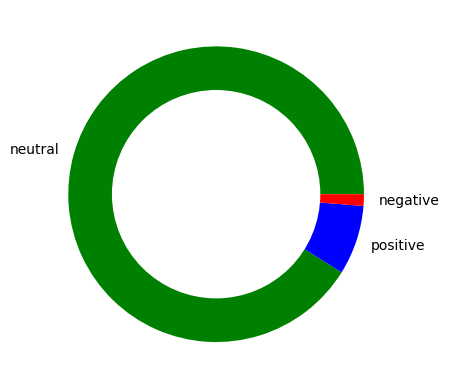

In [37]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [53]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


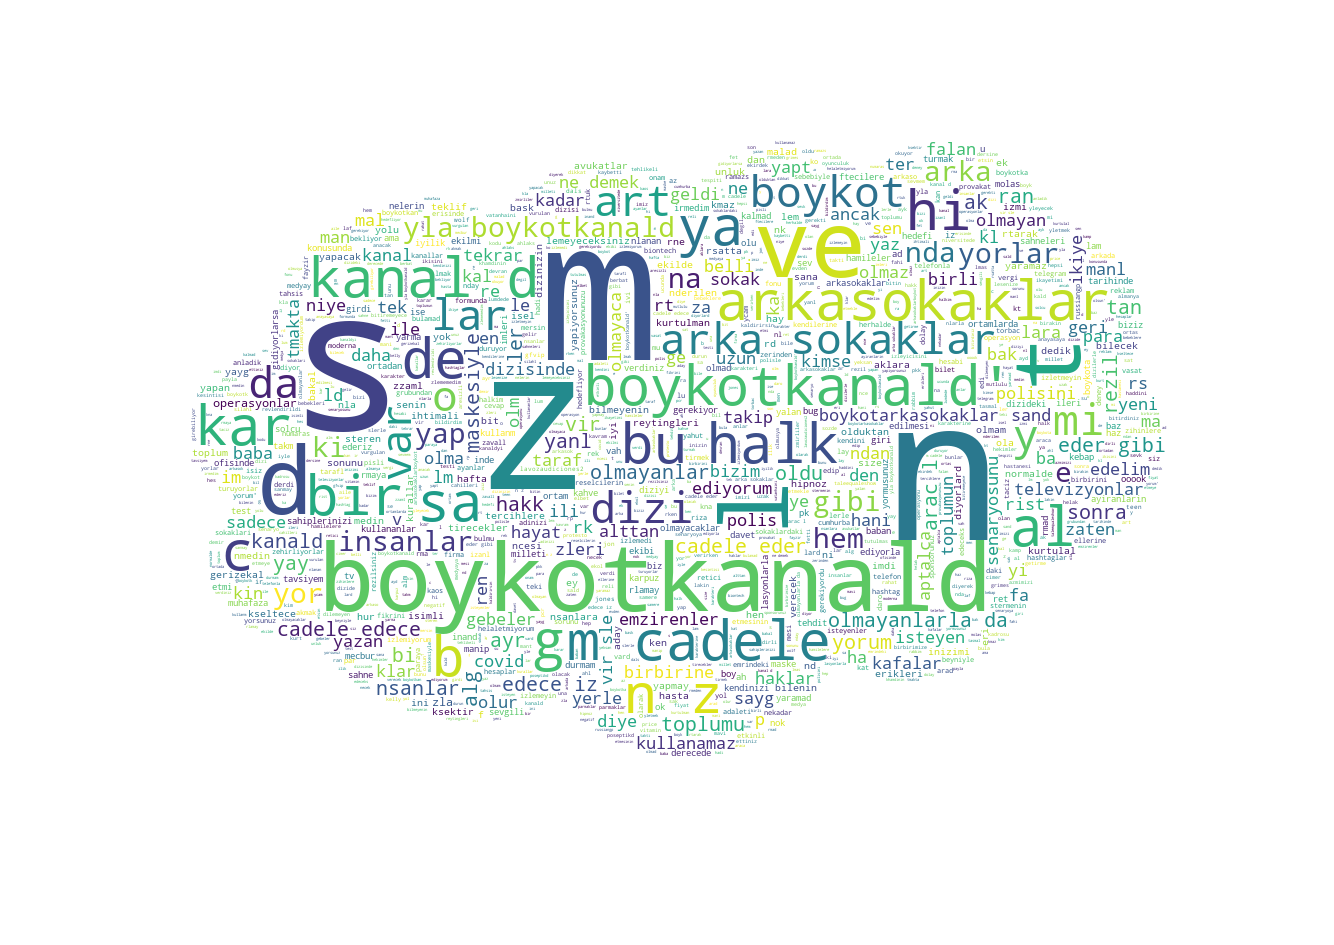

In [39]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


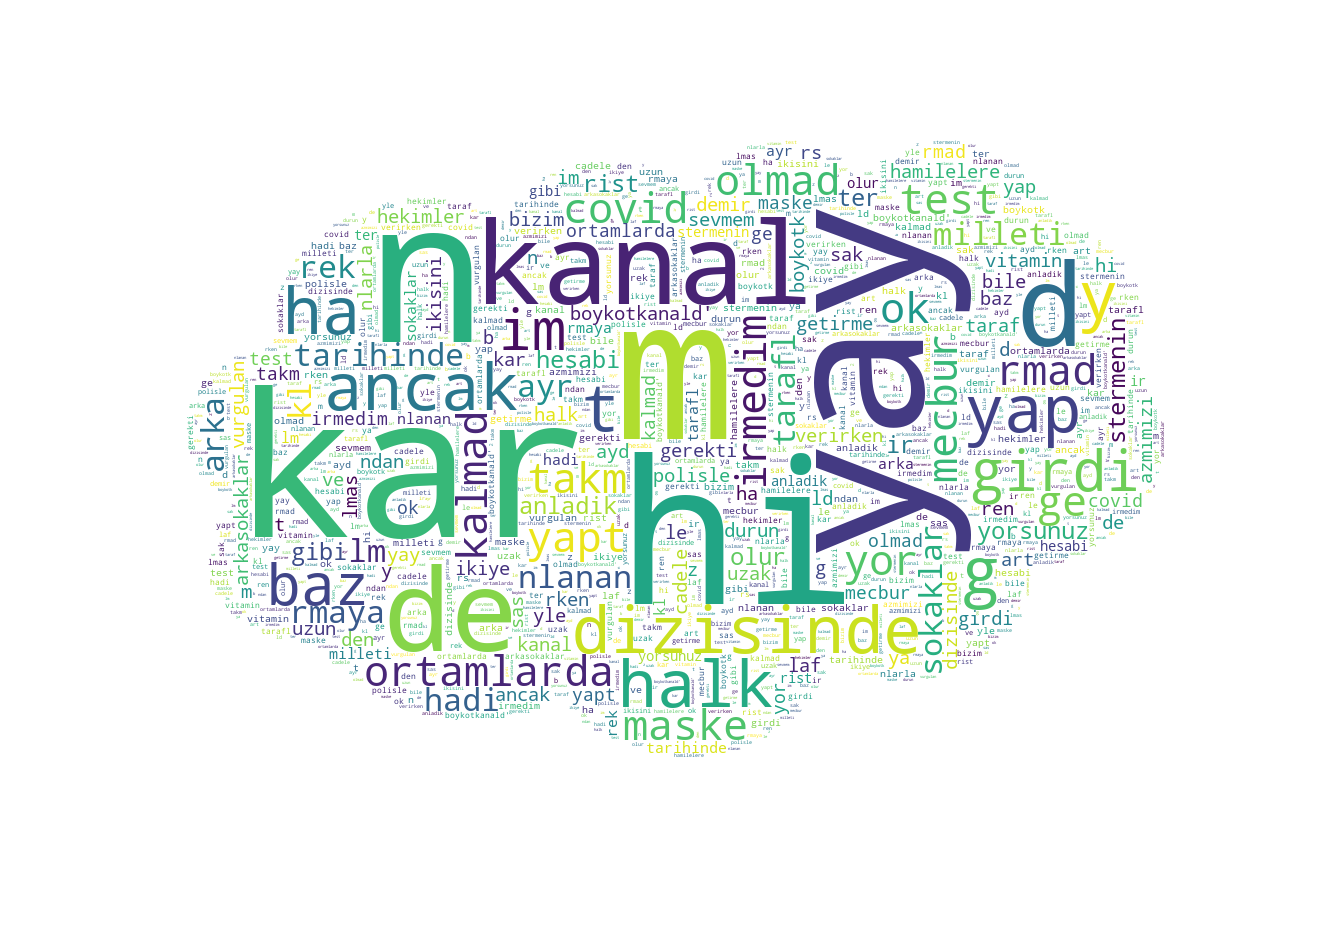

In [51]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


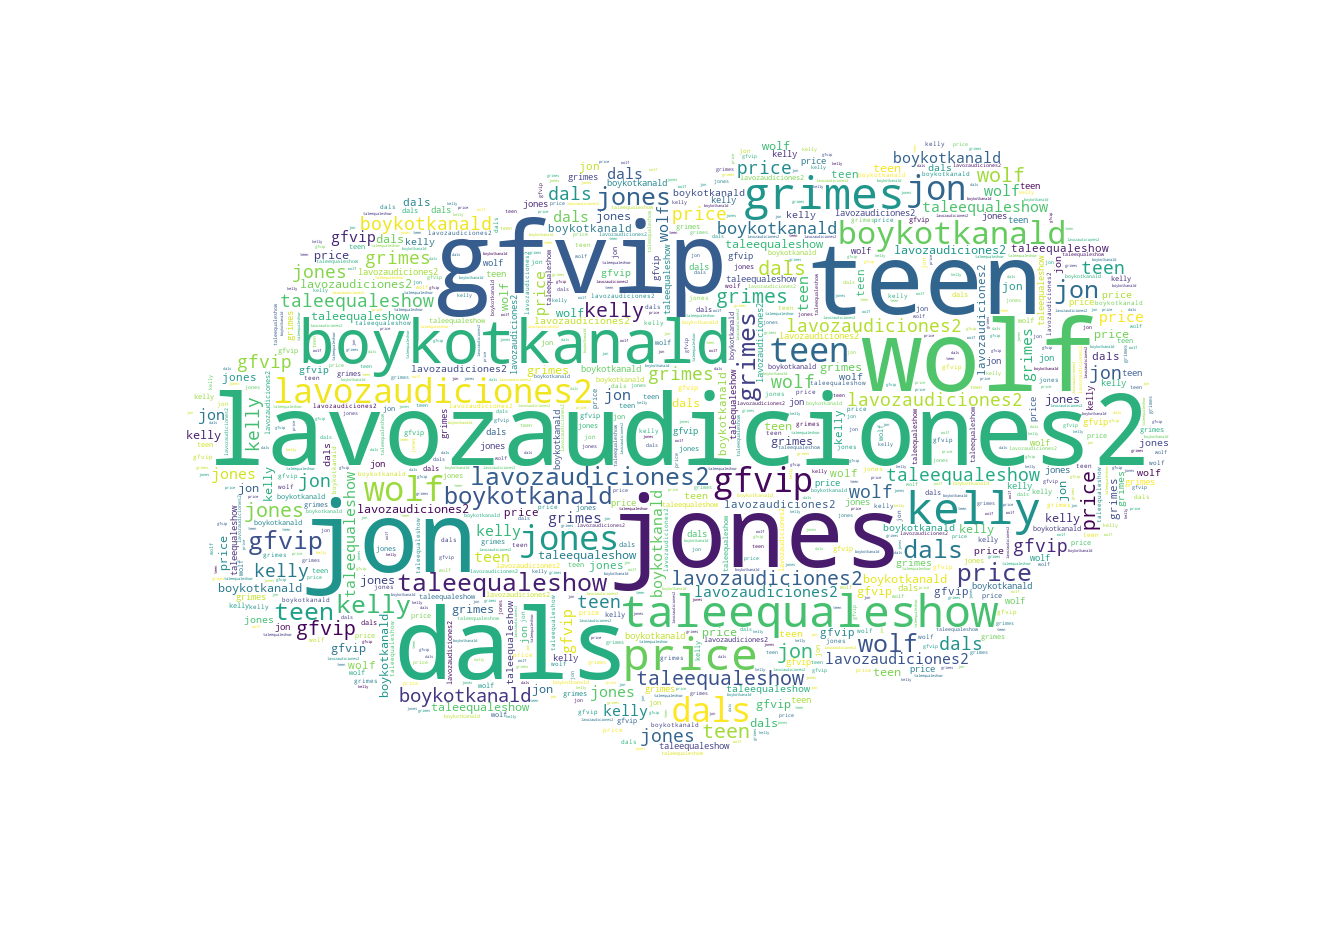

In [41]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


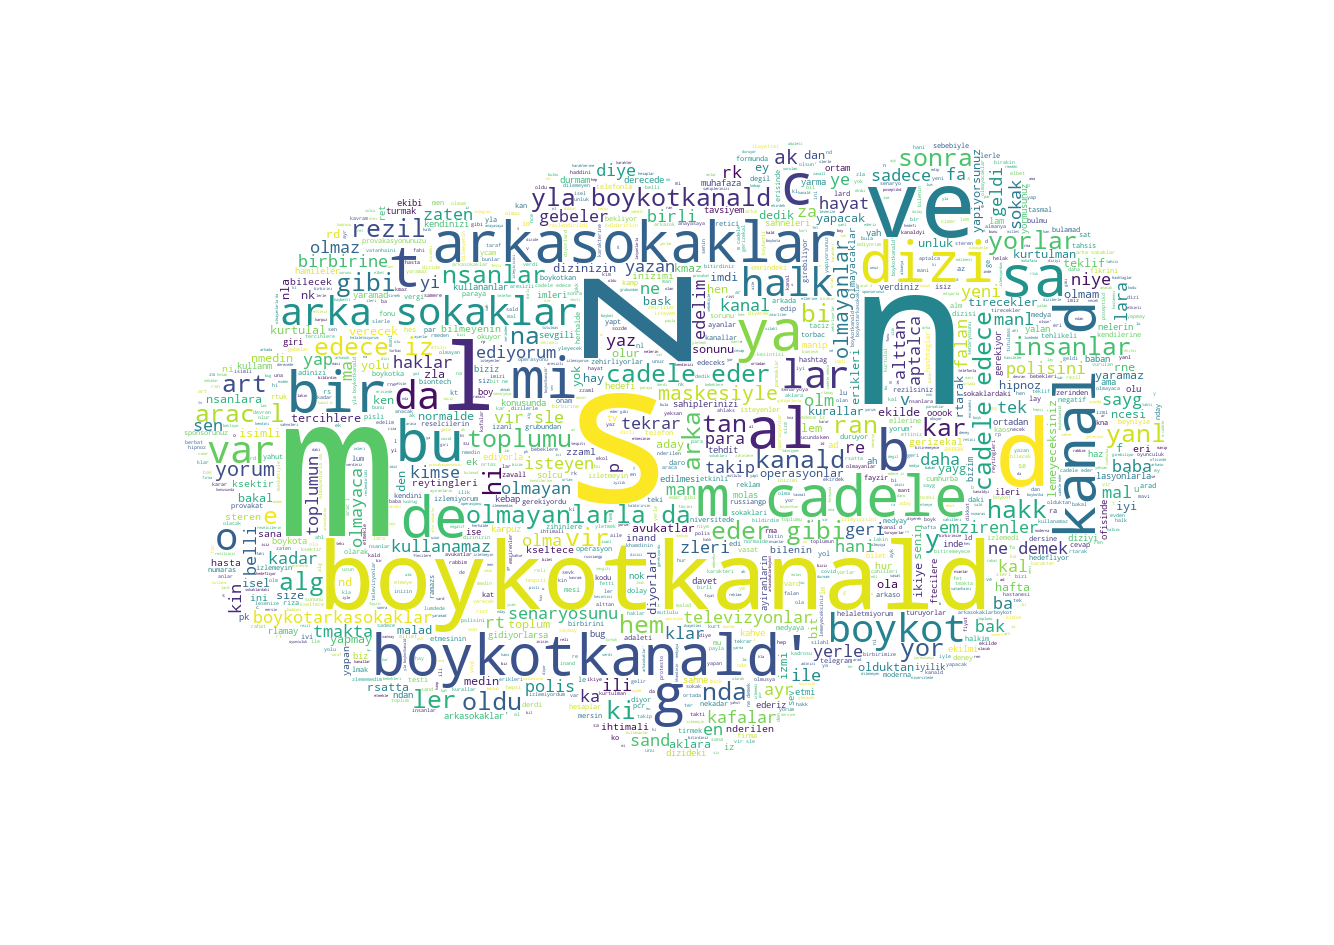

In [52]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

In [42]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [43]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,102.00
neutral,102.01
positive,120.50


In [95]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,17.48
neutral,14.70
positive,17.99


In [44]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [45]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [46]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [47]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [48]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [49]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @seda_cvs: Kalın kafalarınız alsın artık aş...,kal n kafalar n z als n art k a falan olmay...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,127,25,kal n kafalar n z als n art k a falan olmay...,"[, kal, n, kafalar, n, z, als, n, art, k, a, f...","[, kal, n, kafalar, n, z, als, n, art, k, fala...","[, kal, n, kafalar, n, z, al, n, art, k, falan..."
1,RT @teacherszn: Aşı olduktan sonra size haklar...,a olduktan sonra size haklar n z ve hayat ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,125,25,a olduktan sonra size haklar n z ve hayat ...,"[, a, olduktan, sonra, size, haklar, n, z, ve,...","[, olduktan, sonra, size, haklar, n, z, hayat,...","[, olduktan, sonra, size, haklar, n, z, hayat,..."
2,RT @idem23483381: #BoykotKanalD alçaklara kar ...,boykotkanald al aklara kar ya yor medin ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,87,16,boykotkanald al aklara kar ya yor medin ...,"[, boykotkanald, al, aklara, kar, ya, yor, med...","[, boykotkanald, al, aklara, kar, ya, yor, med...","[, boykotkanald, al, aklara, kar, ya, yor, med..."
3,RT @Ulutasomer61: Hipnoz dan kurtulmanın tek b...,hipnoz dan kurtulman n tek bir yolu var t m t...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,81,15,hipnoz dan kurtulman n tek bir yolu var t m t...,"[, hipnoz, dan, kurtulman, n, tek, bir, yolu, ...","[, hipnoz, dan, kurtulman, n, tek, bir, yolu, ...","[, hipnoz, dan, kurtulman, n, tek, bir, yolu, ..."
4,RT @Osmanunsal58: KANAL D hakkında bakalım #RT...,kanal d hakk nda bakal m rt k i lem yapacak ...,0.0,0.0,neutral,0.0,1.0,0.0,0.0,123,27,kanal d hakk nda bakal m rt k i lem yapacak ...,"[, kanal, d, hakk, nda, bakal, m, rt, k, i, le...","[, kanal, hakk, nda, bakal, rt, k, lem, yapaca...","[, kanal, hakk, nda, bakal, rt, k, lem, yapaca..."


In [50]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

79 Number of reviews has 658 words


In [112]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aba,abbey,abc,abi,abo,abseil,absolut,ac,acab,...,zatwardzia,zdo,ze,zero,ziemi,znadziesz,zo,zoo,zoom,zu
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
lockdown,976
london,793
day,110
covid,106
amp,82
uk,70
go,67
new,67
last,61
morn,60


In [54]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [55]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('arka sokaklar', 7),
 ('boykotkanald arkasokaklar', 5),
 ('arkasokaklar boykotkanald', 5),
 ('yla boykotkanald', 5),
 ('olmayanlarla da', 4),
 ('cadele eder', 4),
 ('eder gibi', 4),
 ('cadele edece', 4),
 ('edece iz', 4),
 ('arac yla', 4),
 ('vir sle', 3),
 ('sle cadele', 3),
 ('bu ne', 3),
 ('ne demek', 3),
 ('gibi olmayanlarla', 3),
 ('da cadele', 3),
 ('hi bir', 2),
 ('kar ya', 2),
 ('kanal hakk', 2),
 ('sand boykotkanald', 2)]

In [2]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

NameError: name 'get_top_n_gram' is not defined